##   Introduction

With this first project we are going to practice a basic EDA using a dataset from the bootcamp ___TripleTen DataScienti Course___. We are going to compare the musical preferences between two cities Springfield and Shelbyville, and confirm the following hypothesis:

- The activity of users differs depending on the day of the week and the city

This project will consist of three stages:

1. Data Description
2. Data Preprocessing
3. Hypothesis Testing



## Data Description

In [19]:
#Libraries

import pandas as pd # Importar pandas
import matplotlib.pyplot as plt

In [20]:
# DataSet
df = pd.read_csv('music_project_en.csv') 

# Sample
df.sample(10)

,userID,Track,artist,genre,City,time,Day
54979,9714B719,All By Myself,Keisha Renee,pop,Springfield,20:54:00,Friday
53712,5B5D8EB4,Come Into My Heart (feat. Nina Hagen Louies Ta...,Loka Nunda,rock,Springfield,21:14:28,Wednesday
52826,EDF9637,Umbrella,Ember Island,pop,Springfield,09:44:07,Friday
967,837A6906,Crucify Me,Primal Fear,hard'n'heavy,Shelbyville,14:53:53,Wednesday
15846,73A470D,Carry You,Mac Powell,country,Springfield,09:07:20,Monday
58741,4B9DBE6,Big Bulge,Michael Landau,rock,Springfield,20:06:18,Friday
59216,6CAA6383,NaN,NaN,NaN,Springfield,21:32:17,Friday
16497,2F1DE39D,Time and a Place,Buju Banton,reggae,Shelbyville,13:29:23,Wednesday
49719,64984318,Booty Dance,Usssy,alternative,Springfield,13:56:13,Friday
30485,7E1BD966,God Damn,† krxst †,rusrap,Springfield,20:03:16,Friday


In [21]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


REMAKRS

All fields names have the same datatype, and we have found the following corrections to do:
- Blank spaces and capital letters in their field names.
- There are missing values 

## Data Preprocessing

In [22]:
# Field names correction
print(f"Before: {df.columns}")
new_columns = [] 


for column in df.columns: 
    name_lower = column.lower() 
    name_no_strip = name_lower.strip() 
    new_columns.append(name_no_strip) 

df.columns = new_columns 

snake_case_columns = {
    'userid': 'user_id',
    }

df.rename(columns = snake_case_columns, inplace = True) # Modificamos userid -> user_id

print(f"After: {df.columns}")

Before: Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')
After: Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


In [23]:
# Missing values replaces with 'unknown'
columns_to_replace = ['track','artist','genre']

for column in columns_to_replace:
    df[column].fillna('unknown', inplace = True) 


C:\Users\JoseC\AppData\Local\Temp\ipykernel_6736\3810165280.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('unknown', inplace = True)


In [24]:
# Drop explicit duplicates
df.drop_duplicates(inplace = True)
print(f"Duplicate fields: {df.duplicated().sum()}")

Duplicate fields: 0


In [25]:
# Reviewing unique values
genre_values = df.sort_values(by='genre')['genre'].unique() # Sort
n_unique_values = df.sort_values(by='genre')['genre'].nunique() # Unique

print('Values:', genre_values)


Values: ['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'ambient' 'americana' 'animated' 'anime' 'arabesk' 'arabic' 'arena'
 'argentinetango' 'art' 'audiobook' 'avantgarde' 'axé' 'baile' 'balkan'
 'beats' 'bigroom' 'black' 'bluegrass' 'blues' 'bollywood' 'bossa'
 'brazilian' 'breakbeat' 'breaks' 'broadway' 'cantautori' 'cantopop'
 'canzone' 'caribbean' 'caucasian' 'celtic' 'chamber' 'children' 'chill'
 'chinese' 'choral' 'christian' 'christmas' 'classical' 'classicmetal'
 'club' 'colombian' 'comedy' 'conjazz' 'contemporary' 'country' 'cuban'
 'dance' 'dancehall' 'dancepop' 'dark' 'death' 'deep' 'deutschrock'
 'deutschspr' 'dirty' 'disco' 'dnb' 'documentary' 'downbeat' 'downtempo'
 'drum' 'dub' 'dubstep' 'eastern' 'easy' 'electronic' 'electropop' 'emo'
 'entehno' 'epicmetal' 'estrada' 'ethnic' 'eurofolk' 'european'
 'experimental' 'extrememetal' 'fado' 'film' 'fitness' 'flamenco' 'folk'
 'folklore' 'folkmetal' 'folkrock' 'folktronica' 'forró' 'frankreich'
 'franz

After reviewing the data and to simplify this demo, we are going to replace only the values ___hip,hip-hop and hop___ for ___hiphop___

In [26]:
# Function to remove implicit duplicates
def replace_wrong_genres(wrong_genres,correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'].replace(wrong_genre,correct_genre, inplace=True)
    return df

In [27]:
print('Unique values Before: ', n_unique_values)

duplicates = ['hip','hop','hip-hop'] 
correct_genre = 'hiphop'

replace_wrong_genres(duplicates,correct_genre) #Le pasamos los argumentos a la función


genre_values = df.sort_values(by='genre')['genre'].unique() #Ordenamos y extramos los valores únicos de genre
n_unique_values = df.sort_values(by='genre')['genre'].nunique() # Contamos la cantidad de valores unicos de genre

print('Unique values After: ', n_unique_values)


Unique values Before:  269
Unique values After:  266


C:\Users\JoseC\AppData\Local\Temp\ipykernel_6736\3719554245.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].replace(wrong_genre,correct_genre, inplace=True)


## Hypothesis Testing

For this section, we are going to create some chart to review the information before working on the hypothesis

Text(0, 0.5, '# Songs played')

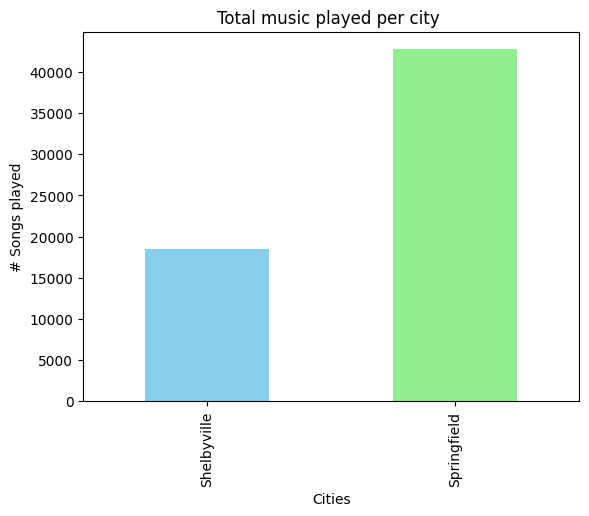

In [89]:
# Chart #1
city = df.groupby('city')['genre'].count()
city.plot(kind='bar', color=['skyblue','lightgreen'])

plt.title("Total music played per city ")
plt.xlabel("Cities")
plt.ylabel("# Songs played")


Text(0, 0.5, '# Songs played')

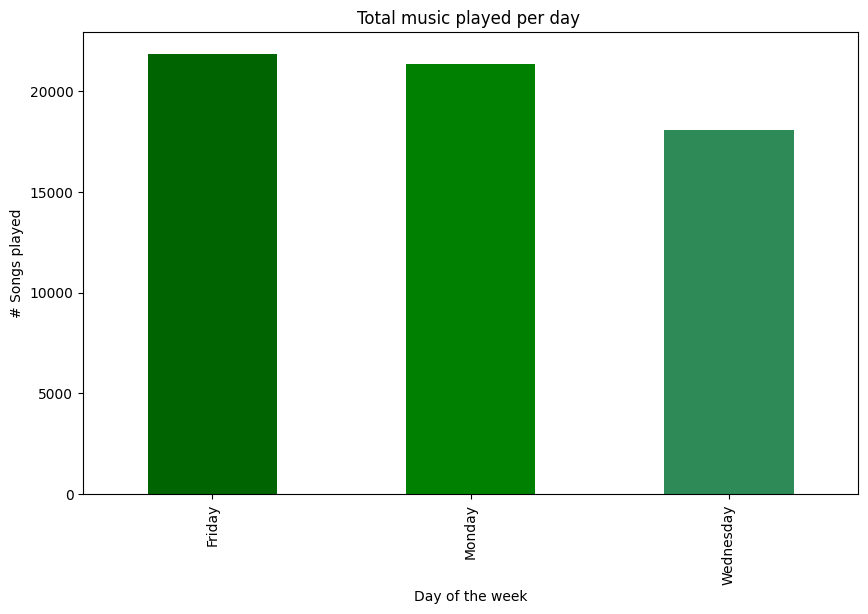

In [90]:
#Chart #2
day = df.groupby('day')['genre'].count()
day.plot(kind='bar', figsize=(10, 6), color=['darkgreen','green','seagreen'])

plt.title("Total music played per day ")
plt.xlabel("Day of the week")
plt.ylabel("# Songs played")

In [84]:
#Create a new DataSet
sp_data = df[df['city'] == 'Springfield'].groupby('day').count().reset_index()[['day','genre']]
sv_data = df[df['city'] == 'Shelbyville'].groupby('day').count().reset_index()[['day','genre']]

cities = sp_data.merge(sv_data, on ='day', how='left')
cities = cities.set_index('day')

cities.rename(columns={
    'genre_x': 'Springfield',
    'genre_y':'Shelbyville'
}, inplace=True)

Text(0, 0.5, '# Songs played')

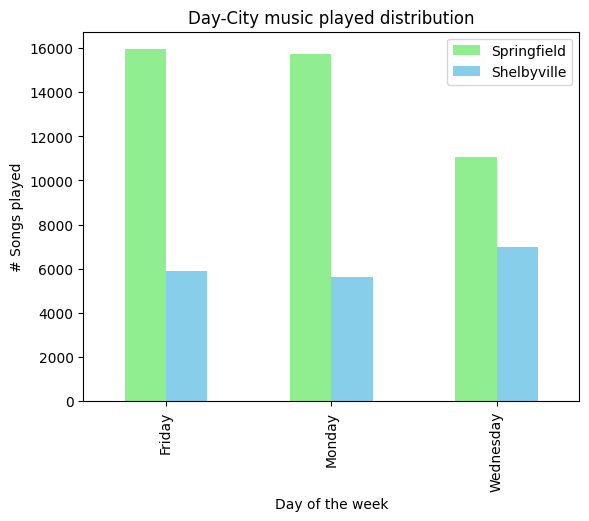

In [93]:
# Chart #3
cities.plot(kind='bar', color=['Lightgreen','skyblue'])

plt.title('Day-City music played distribution')
plt.xlabel('Day of the week')
plt.ylabel('# Songs played')

REMAKRS

In regards of the original hypothesis "The activity of users differs depending on the day of the week and the city" we have found the following:

- There is a higher trend in the number of plays on Mondays and Fridays in Springfield.
- There is a higher trend in the number of plays on Wednesdays in Shelbyville.
- Around 30% of all plays are made by Shelbyville (18,512 plays).
- Around 70% of all plays are made by Springfield (42,741 plays).